In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import StandardScaler

# Load the dataset
df = pd.read_csv('../data/results/hotel_booking_cancellation_prediction_one_hot_deposit.csv')

In [2]:
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the dataset

# Convert the months in 'arrival_date' to numerical values
df['arrival_date_month'] = pd.to_datetime(df['arrival_date']).dt.month

# Define the X and dropping unnecessary columns
X = df.drop(columns=['is_canceled', 'arrival_date', 'stays_in_weeks_nights',
                      'children', 'babies', 'room_changed'])

# Target variable
y = df['is_canceled']

In [3]:
# Split the dataset into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()

# Fit the scaler on the training data 
X_train_scaled = scaler.fit_transform(X_train)

# Fit the scaler on the test data
X_test_scaled = scaler.transform(X_test)


# Create the model
model = LogisticRegression(max_iter=15000)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.823947234906139

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1231
           1       0.83      0.67      0.74       740

    accuracy                           0.82      1971
   macro avg       0.82      0.79      0.80      1971
weighted avg       0.82      0.82      0.82      1971



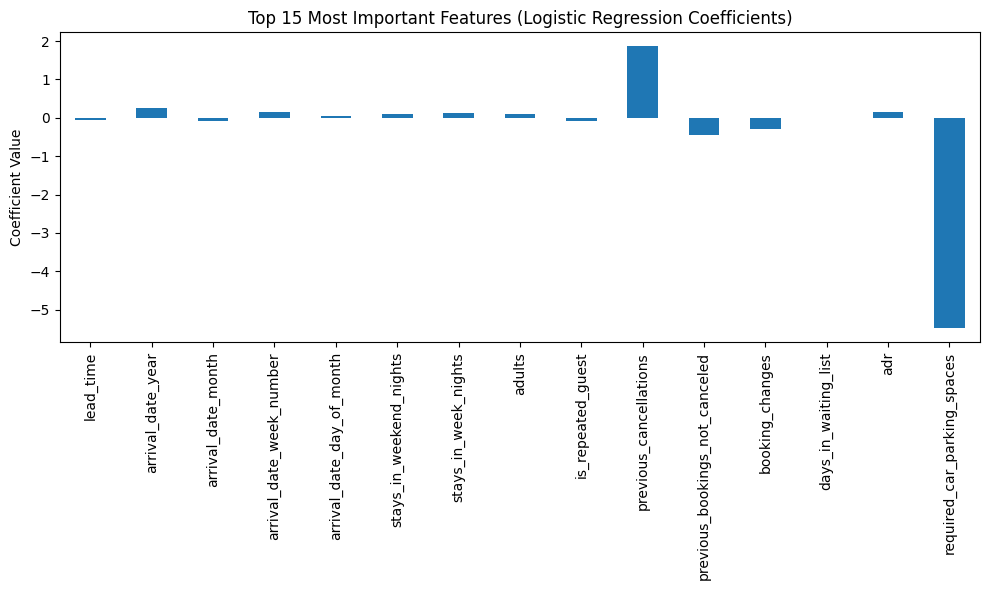

In [4]:
import matplotlib.pyplot as plt

coefficients = model.coef_[0]

# Asociază numele coloanelor cu coeficienții
feature_importance = pd.Series(coefficients, index=X.columns)

plt.figure(figsize=(10, 6))
feature_importance.head(15).plot(kind='bar')
plt.title('Top 15 Most Important Features (Logistic Regression Coefficients)')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()
